# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import numpy as np
import pandas as pd


df_raw = pd.read_csv("student-mat.csv", sep=';')
df = df_raw.copy()
print(df.shape)
df


(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns


df_filtered = df.copy()
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

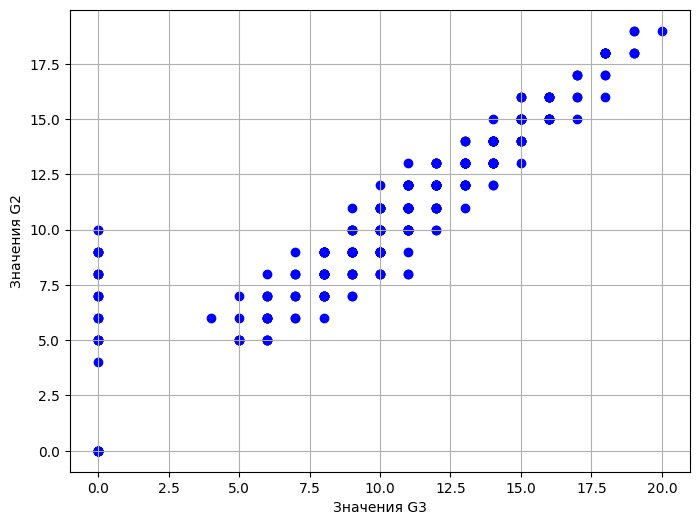

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(df_filtered['G3'], df_filtered['G2'], color='blue', label='G2')
plt.xlabel('Значения G3')
plt.ylabel('Значения G2')
plt.grid(True)

In [5]:
df_new = df_filtered.copy()

absences = df_new['absences'] > 30
df_new.loc[absences, 'absences'] = df_new['absences'].median()
values = df_new['G3'] == 0
df_new.loc[values, 'G1'] = df_new['G1'].min()
df_new.loc[values, 'G2'] = df_new['G2'].min()


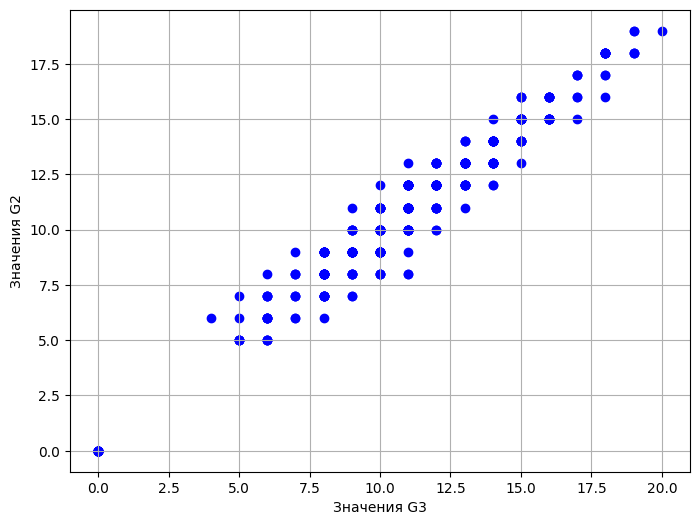

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(df_new['G3'], df_new['G2'], color='blue', label='G2')
plt.xlabel('Значения G3')
plt.ylabel('Значения G2')
plt.grid(True)

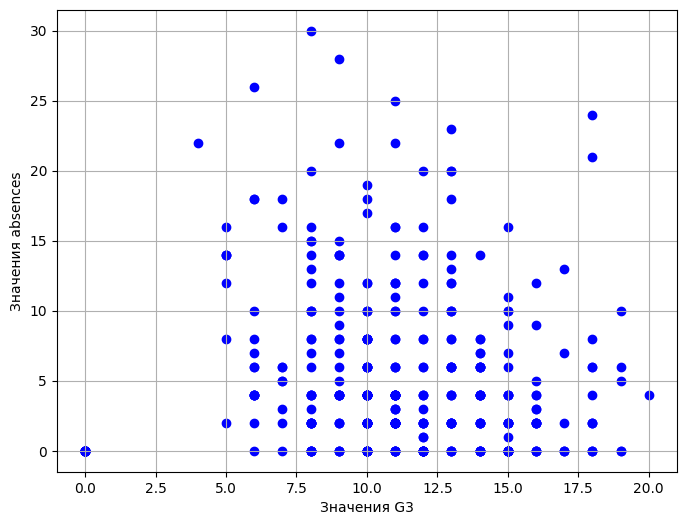

In [8]:
plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(df_new['G3'], df_new['absences'], color='blue', label='absences')
plt.xlabel('Значения G3')
plt.ylabel('Значения absences')
plt.grid(True)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_new)
scaled_df = pd.DataFrame(scaled_data, columns=df_new.columns)

In [59]:
from sklearn.model_selection import train_test_split

X = df_new.drop('G3', axis=1)  # Признаки
Y = df_new['G3']

X1 = scaled_df.drop('G3', axis=1)  # Признаки
Y1 = scaled_df['G3']

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)


In [60]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=1000,
                    max_iter=3500,
                   verbose=True
                    )
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.05647714
Iteration 2, loss = 0.04904480
Iteration 3, loss = 0.01998838
Iteration 4, loss = 0.02817136
Iteration 5, loss = 0.01983040
Iteration 6, loss = 0.01257537
Iteration 7, loss = 0.01660625
Iteration 8, loss = 0.00909682
Iteration 9, loss = 0.00791132
Iteration 10, loss = 0.00894182
Iteration 11, loss = 0.00463118
Iteration 12, loss = 0.00567202
Iteration 13, loss = 0.00460463
Iteration 14, loss = 0.00277338
Iteration 15, loss = 0.00413872
Iteration 16, loss = 0.00236326
Iteration 17, loss = 0.00262673
Iteration 18, loss = 0.00223430
Iteration 19, loss = 0.00172806
Iteration 20, loss = 0.00196838
Iteration 21, loss = 0.00139714
Iteration 22, loss = 0.00161039
Iteration 23, loss = 0.00118239
Iteration 24, loss = 0.00123680
Iteration 25, loss = 0.00099547
Iteration 26, loss = 0.00102032
Iteration 27, loss = 0.00088317
Iteration 28, loss = 0.00089928
Iteration 29, loss = 0.00083117
Iteration 30, loss = 0.00080439
Iteration 31, loss = 0.00075597
Iteration 32, los

MLPRegressor(hidden_layer_sizes=1000, max_iter=3500, verbose=True)

In [61]:
print(f"Training set score: {mlp.score(X_train, y_train):.3%}")
print(f"Testing set score: {mlp.score(X_test, y_test):.3%}\n")


Training set score: 97.889%
Testing set score: 90.944%



In [62]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

y_pred = mlp.predict(X_test)

# Среднеквадратичная ошибка (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")

# Коэффициент детерминации (R²)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

MSE: 0.0046
RMSE: 0.0681
R²: 0.9094
